In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center >= radius
    return mask

def create_ellipse_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[-a:h-a, -b:w-b]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center >= radius
    return mask

def ellipse_mask(a, b, n, r):
    y,x = np.ogrid[-a:n-a, -b:n-b]
    mask = x**2 + y**2 <= r**2
    arr = np.ones((n,n))
    arr[mask] = 255
    return arr

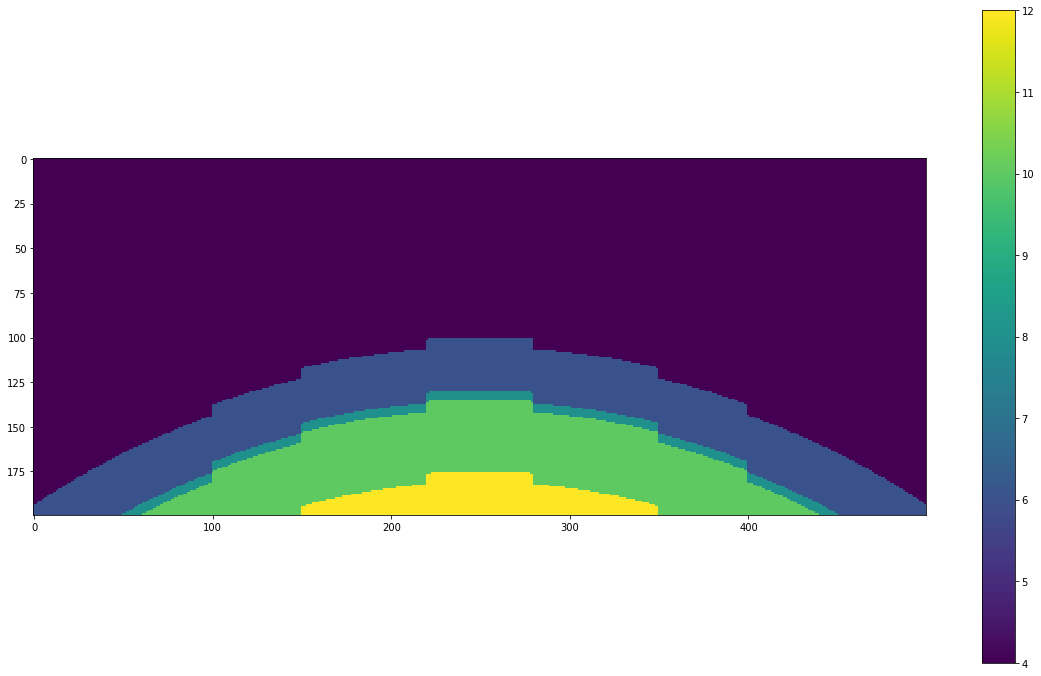

In [17]:
arr = np.ones((200,500))
center = [arr.shape[1] / 2, 550]

mask_1 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=450)
mask_2 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=420)
mask_3 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=415)
mask_4 = create_circular_mask(arr.shape[0], arr.shape[1], center=center, radius=375)
mask_1 = np.where(mask_1 == True, mask_1, 3)
mask_2 = np.where(mask_2 == True, mask_2, 3)
mask_3 = np.where(mask_3 == True, mask_3, 3)
mask_4 = np.where(mask_4 == True, mask_4, 3)

# plt.imshow(mask_1 + mask_2 + mask_4 + mask_3)


anticline_vp = mask_1 + mask_2 + mask_3 + mask_4

new = anticline_vp
flt_offsets = [6,6,6]

for i,j in zip(flt_offsets, [280,350,400]):
    fault = np.roll(anticline_vp, i, axis=0)[:,j:]
    new[:,j:] = fault

for i,j in zip(flt_offsets, [220,150,100]):
    fault = np.roll(anticline_vp, i, axis=0)[:,:j]
    new[:,:j] = fault
new[:50, :] = 4

    
plt.figure(figsize=(20,12))
plt.imshow(new, cmap='viridis')
plt.colorbar()

# np.save('/data/anticline_vp_no_faults.npy', anticline_vp)

In [13]:
flt_offsets

array([6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6.])

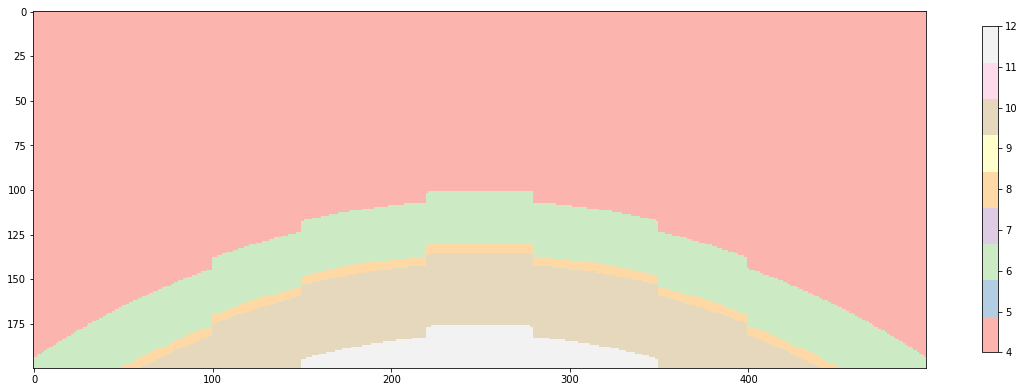

In [9]:
anticline_broad_vp_faults_5mres_30mflt = new.astype('float64')
anticline_broad_vp_faults_5mres_30mflt[:25,:] =4.6
anticline_broad_vp_faults_5mres_30mflt[anticline_broad_vp_faults_5mres_20mflt == 4] = 2.9
anticline_broad_vp_faults_5mres_30mflt[anticline_broad_vp_faults_5mres_20mflt == 6] = 3.3
anticline_broad_vp_faults_5mres_30mflt[anticline_broad_vp_faults_5mres_20mflt == 8] = 3.2
anticline_broad_vp_faults_5mres_30mflt[anticline_broad_vp_faults_5mres_20mflt == 10] = 3.3
anticline_broad_vp_faults_5mres_30mflt[anticline_broad_vp_faults_5mres_20mflt == 12] = 2.9

plt.figure(figsize=(20,12))
plt.imshow(anticline_broad_vp_faults_5mres_30mflt, aspect='equal', cmap='Pastel1')
plt.colorbar(shrink=0.5)

# np.save('data/anticline_broad_vp_faults_5mres_30mflt.npy', anticline_broad_vp_faults_5mres_30mflt)

In [7]:
from skimage.transform import resize

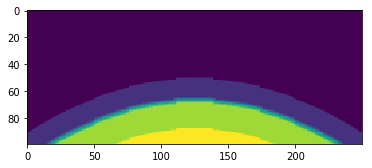

In [53]:
new_size = resize(new, output_shape=(100,250),mode='reflect', anti_aliasing=True)
plt.imshow(new_size)

In [54]:
anticline_vp_faults_5m = buttz.astype('float64')
anticline_vp_faults_5m[:50,:] =-1
anticline_vp_faults_5m[anticline_vp_faults_5m == 6] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 2] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 6] = 2.6
anticline_vp_faults_5m[anticline_vp_faults_5m == 4] = 2.9
anticline_vp_faults_5m[anticline_vp_faults_5m == -1] = 4.

plt.imshow(anticline_vp_faults_5m, aspect='equal', cmap='Pastel1')
plt.colorbar(shrink=0.5)

NameError: name 'buttz' is not defined

In [210]:
np.save('data/anticline_vp_faults_5m.npy', anticline_vp_faults_5m)
np.save('data/anticline_vp_faults_5m.npy', anticline_vp)

### 45 degree faults

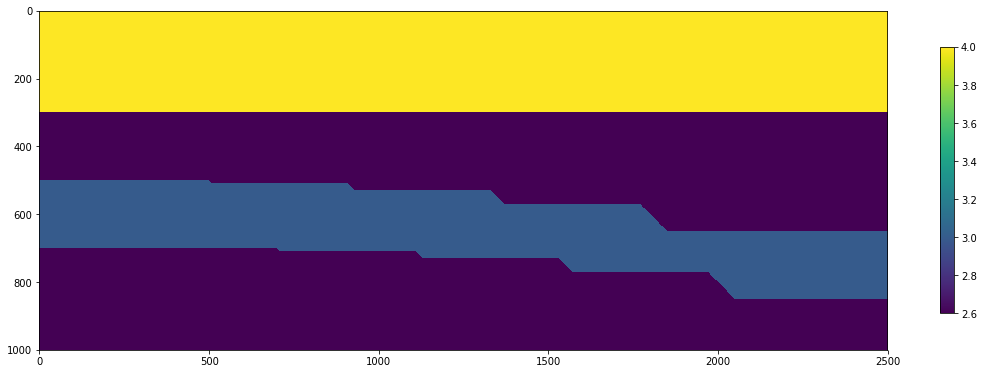

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

test_v = np.ones((1000,2500))
test_v = np.tril(test_v)


test_v[:500,:] = 1.5
test_v[700:,:] = 1.5
for i in range(10):
    test_v[500+i,500+i:] = 1.5
    test_v[700+i,700+i:] = 0
for i in range(20):
    test_v[10 + 500 + i, 10 + 900 + i:] = 1.5
    test_v[10 + 700 + i, 10 + 1100 + i:] = 0
for i in range(40):
    test_v[30 + 500 + i, 30 + 1300 + i:] = 1.5
    test_v[30 + 700 + i, 30 + 1500 + i:] = 0
for i in range(80):
    test_v[70 + 500 + i, 70 + 1700 + i:] = 1.5
    test_v[70 + 700 + i, 70 + 1900 + i:] = 0    

test_v = np.array(test_v)
test_v[test_v==0] = 3.
test_v[test_v==1] = 3.
test_v[test_v==1.5] = 2.6

test_v[:300,:] = 4

plt.figure(figsize=(19,7))

plt.imshow(test_v)
plt.colorbar(shrink=0.7)

### 60 (*63) degree faults

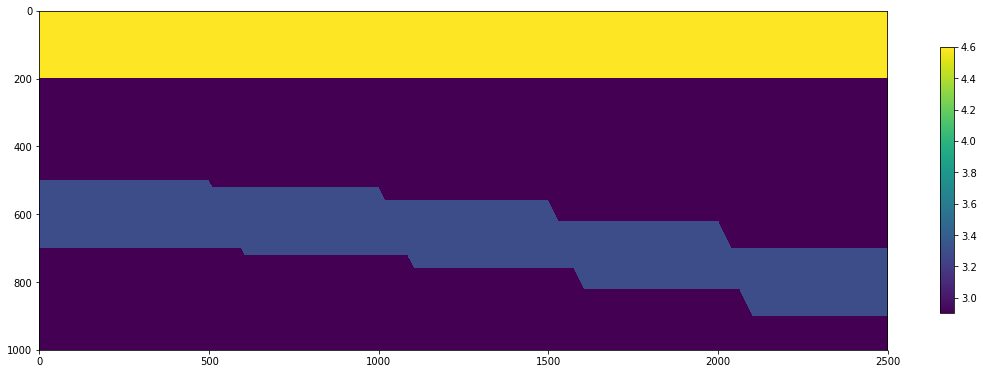

In [5]:
sixty_v = np.ones((1000,2500))
sixty_v = sixty_v * 2.9
sixty_v[:200,:] = 4.6

for i in range(100):
    sixty_v[500 + i*2:502 + i*2, :500 + i] = 3.3
for i in range(100):
    sixty_v[520 + i*2:522 + i*2, 505 + i:1000 + i] = 3.3
for i in range(100):
    sixty_v[560 + i*2:562 + i*2, 1005 + i:1500 + i] = 3.3
for i in range(100):
    sixty_v[620 + i*2:622 + i*2, 1505 + i:2000 + i] = 3.3
for i in range(100):
    sixty_v[700 + i*2:702 + i*2, 2002 + i:] = 3.3

plt.figure(figsize=(19,7))

plt.imshow(sixty_v)
plt.colorbar(shrink=0.7)

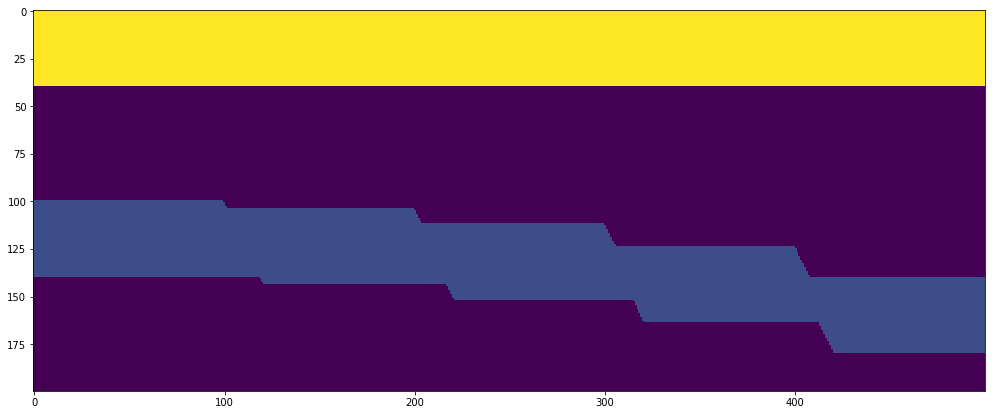

In [8]:
sixty_v_resize = resize(sixty_v, output_shape=(200,500),mode='reflect', anti_aliasing=False)
plt.figure(figsize=(19,7))
np.save('data/63_deg_norm_fault_vp_5m_lgr_offset.npy', sixty_v_resize)
plt.imshow(sixty_v_resize)

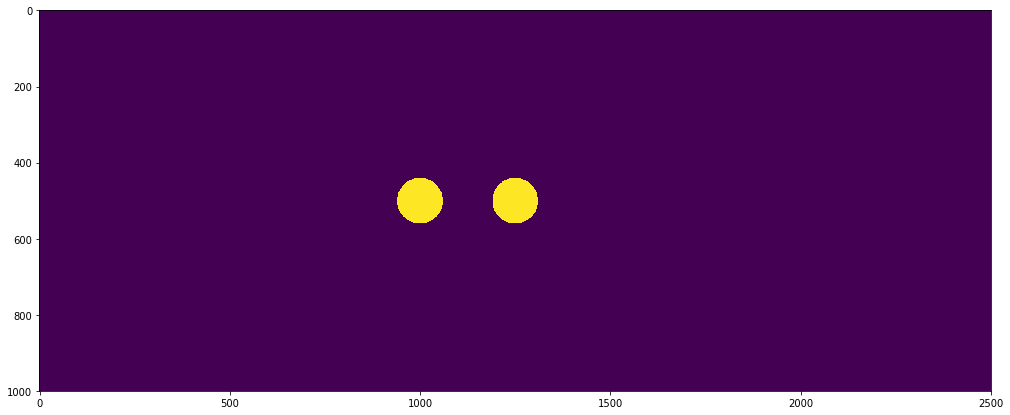

In [11]:
test_v = np.ones((1000,2500))
mask_1 = create_circular_mask(test_v.shape[0], test_v.shape[1],radius=60)
mask_2 = create_circular_mask(test_v.shape[0], test_v.shape[1], center=(1000,500), radius=60)
mask_1 = np.where(mask_1 == True, mask_1, 3)
mask_2 = np.where(mask_2 == True, mask_2, 3)
test_v = mask_1 + mask_2

plt.figure(figsize=(19,7))
plt.imshow(test_v)

In [3]:
import verde
import numpy as np
import matplotlib.pyplot as plt

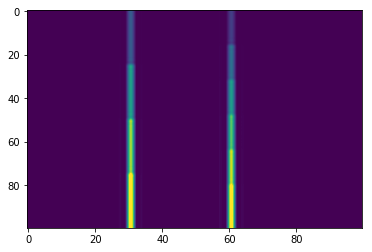

In [14]:
imp_test = np.zeros((100,100))
for i in range(4):
    step=int(imp_test.shape[0] / 4)
    imp_test[i * step:,30:32] = (i + 1) * step

for i in range(6):
    step=int(imp_test.shape[0] / 6)
    imp_test[i * step:,60:62] = (i + 1) * step
    
plt.imshow(imp_test, aspect='auto', interpolation='bessel')

In [15]:
from scipy.interpolate import interp1d


In [16]:
x = np.arange(imp_test.shape[0])

In [17]:
fit = interp1d(x,imp_test,kind='nearest')

In [18]:
new = fit(imp_test)

ValueError: A value in x_new is above the interpolation range.